# Libraries for the Project

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
from keras.utils import np_utils


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd /content/drive/My Drive/Fashion MNIST

/content/drive/My Drive/Fashion MNIST


**Parameters**

In [ ]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 20
BATCH_SIZE = 128

IS_LOCAL = False

There are 10 different classes of images, as following:

0: T-shirt/top;
1: Trouser;
2: Pullover;
3: Dress;
4: Coat;
5: Sandal;
6: Shirt;
7: Sneaker;
8: Bag;
9: Ankle boot.
Image dimmensions are 28x28.

The train set and test set are given in two separate datasets.

In [ ]:
train_file = "fashion-mnist_train.csv"
test_file  = "fashion-mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [ ]:
train_data.tail(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59990,0,0,0,0,0,0,0,0,0,0,...,154,161,165,83,0,5,0,0,0,0
59991,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59992,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59993,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,141,113,9,0,0,0
59994,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Dimension of Train and Test Dataset**

In [ ]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In this section, we will look into how many images exists in the dataset per class.

In [ ]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



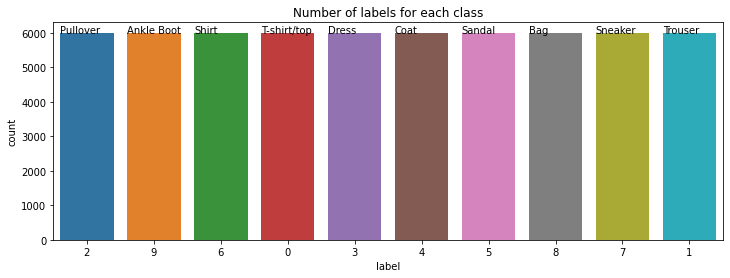

In [ ]:
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()  
    
plot_label_per_class(train_data)


**Test set images class distribution**

In [ ]:
get_classes_distribution(test_data)


T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


Also in the test set the 10 classes are equaly distributed (10% each).

Lets' also plot the class distribution.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



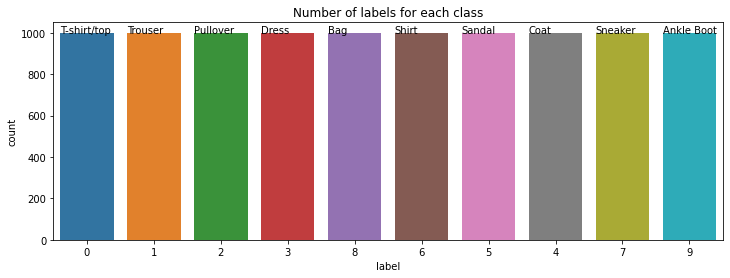

In [ ]:
plot_label_per_class(test_data)

**Train set images**

---
Let's plot some samples for the images.
We add labels to the train set images, with the corresponding fashion item category.


In [ ]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


Let's now plot the images.
The labels are shown above each image.

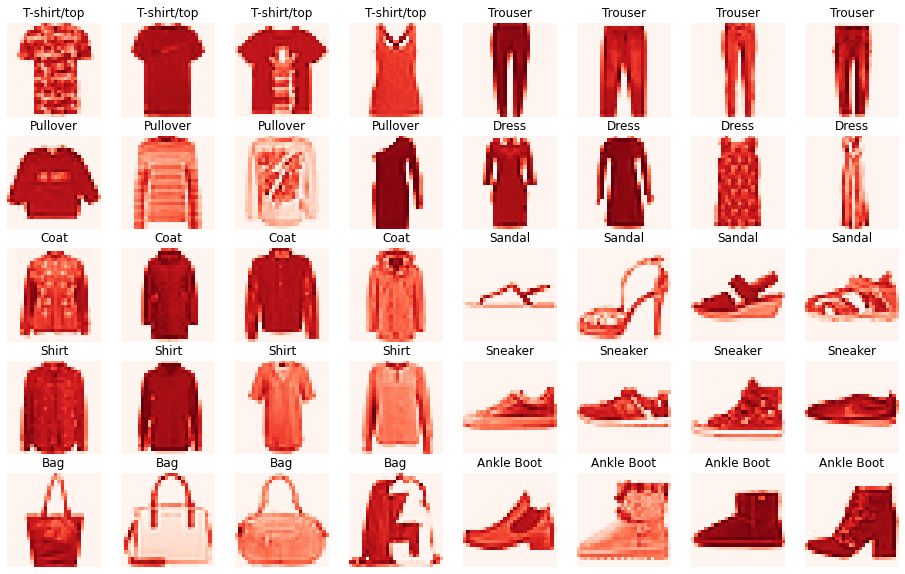

In [ ]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Reds")

# Test set images
Let's plot now a selection of the test set images.
Labels are as well added (they are known).

Total number of sample images to plot:  40


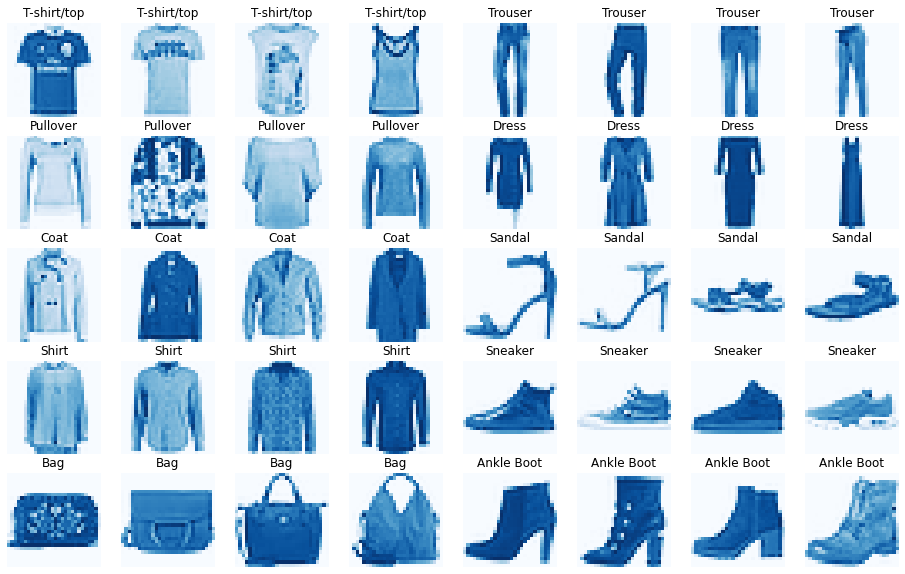

In [ ]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

# Data preprocessing

First we will do a data preprocessing to prepare for the model.

We reshape the columns from (784) to (28,28,1). We also save label (target) feature as a separate vector.

In [ ]:
from keras.utils import np_utils

# data preprocessing
def data_preprocessing(raw):
    out_y = np_utils.to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

using the function data_preprocessing we prepared both the test and train data

In [ ]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

# Split train in train and validation set: 

We further split the train set in train and validation set. The validation set will be 20% from the original train set, therefore the split will be train/validation of 0.8/0.2.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

The dimmension of the processed train, validation and test set are as following:

In [ ]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


# TRAIN THE MODEL

# Build the model
We will use a Sequential model.

The Sequential model is a linear stack of layers. It can be first initialized and then we add layers using add method or we can add all layers at init stage. The layers added are as follows:

**Conv2D** is a 2D Convolutional layer (i.e. spatial convolution over images). The parameters used are:

**filters** - the number of filters (Kernels) used with this layer; here filters = 32;

**kernel_size** - the dimmension of the Kernel: (3 x 3);

**activation** - is the activation function used, in this case **relu**;

**kernel_initializer** - the function used for initializing the kernel;

**input_shape** - is the shape of the image presented to the CNN: in our case is 28 x 28 The input and output of the Conv2D is a 4D tensor.


**MaxPooling2D** is a Max pooling operation for spatial data. Parameters used here are:

**pool_size**, in this case (2,2), representing the factors by which to downscale in both directions;

**Conv2D** with the following parameters:

**filters**: 64;

**kernel_size** : (3 x 3);

**activation** : relu;

**MaxPooling2D with parameter:**

**pool_size** : (2,2);

Conv2D with the following parameters:

filters: 128;

kernel_size : (3 x 3);

activation : relu;

**Flatten**: This layer Flattens the input. Does not affect the batch size. It is used without parameters;


**Dense**: This layer is a regular fully-connected NN layer. It is used without parameters;


**units** - this is a positive integer, with the meaning: dimensionality of the output space; in this case is: 128;

**activation** - activation function : relu;


**Dense**: This is the final layer (fully connected). It is used with the parameters:

**units**: the number of classes (in our case 10);

activation : softmax; for this final layer it is used softmax activation (standard for multiclass classification).

Then we compile the model, specifying as well the following parameters:

loss;

optimizer;

metrics.

In [ ]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

# Run The Model

We run the model with the training set. We are also using the validation set (a subset from the orginal training set) for validation.

In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/20
375/375 [==============================] - 49s 127ms/step - loss: 0.5364 - accuracy: 0.8054 - val_loss: 0.3723 - val_accuracy: 0.8666
Epoch 2/20
375/375 [==============================] - 47s 126ms/step - loss: 0.3397 - accuracy: 0.8776 - val_loss: 0.3093 - val_accuracy: 0.8907
Epoch 3/20
375/375 [==============================] - 45s 120ms/step - loss: 0.2871 - accuracy: 0.8953 - val_loss: 0.3146 - val_accuracy: 0.8866
Epoch 4/20
375/375 [==============================] - 45s 120ms/step - loss: 0.2527 - accuracy: 0.9087 - val_loss: 0.3397 - val_accuracy: 0.8803
Epoch 5/20
375/375 [==============================] - 48s 129ms/step - loss: 0.2282 - accuracy: 0.9157 - val_loss: 0.2812 - val_accuracy: 0.8969
Epoch 6/20
375/375 [==============================] - 45s 119ms/step - loss: 0.1997 - accuracy: 0.9264 - val_loss: 0.2664 - val_accuracy: 0.9072
Epoch 7/20
375/375 [==============================] - 45s 119ms/step - loss: 0.1798 - accuracy: 0.9343 - val_loss: 0.2516 - val_ac

# Test prediction accuracy

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

**Test accuracy is around 0.914, and loss around 0.366.**


We evaluated the model accuracy based on the predicted values for the test set. Let's check the validation value during training.





# Validation accuracy and loss 

In this section, we shall plot the train and validation accuracy and loss, from the train history.

In [ ]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(train_model)

# Add Dropout layers to the model: 

We add several Dropout layers to the model, to help avoiding overfitting.

In [ ]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

# Re-train the model

Let's look at the model summary first:

In [ ]:
model.summary()


And now let's train the new model.



In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

# Prediction accuracy with the new model:

 Let's re-evaluate the prediction accuracy with the new model of the dropout layer.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Here, the loss got decreased from 0.36 to 0.20, and the accuracy also improved from 0.91 to 0.92. So, adding the dropout layer became a big help.

In [ ]:
test_data.head(2)

In [ ]:
test_data['label'].to_numpy()

In [ ]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)
#get the indices to be plotted
y_true = test_data.iloc[:, 0].to_numpy()

print(predicted_classes)
print(y_true)

In [ ]:
p = predicted_classes[:10000]
y = y_true[:10000]

print(p.shape)
print(y.shape)

print(y)
print(p)

correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [ ]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

In [ ]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

# Correctly classified images: 

We visualize few images correctly classified.

In [ ]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()    
    
plot_images(correct, "Greens")

# **Incorrectly classified images**

In [ ]:
plot_images(incorrect, "Reds")
